<a href="https://colab.research.google.com/github/taha2samy/UDacity-projects/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. introducation
## what we need from this dataset ?
 ##   how can  make moive has a high  moives?
 ## this throught
<ul>
<li>We need the most popular moives,</li>
<li>what is the most revenue moives ?</li>
<li>what is the most popular moives ?</li>
<li>what is the most moives moives ?</li>
<li>who's the best ditector can make great profits ?</li>
<li>What is the most profitable company ?</li>
<li>Is the film industry a good investment?</li>
</ul>

# 1.0 update library pandas

### we should update pandas to avoid any prblem



---



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

     |████████████████████████████████| 10.4 MB 36.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.0 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.25.0 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.0 which is incompatible.


<h1>2.0 import dataset <h1>

---



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

In [ ]:
import os
# to get file 
print(os.getcwd())
os.listdir(path=".")


/content


['.config', 'tmdb-movies.csv', 'sample_data']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# 3.0 import dataset


---



In [ ]:
df = pd.read_csv("tmdb-movies.csv")
df.head(10)

id    imdb_id  popularity  ...  release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  ...        2015.0  1.379999e+08  1.392446e+09
1   76341  tt1392190   28.419936  ...        2015.0  1.379999e+08  3.481613e+08
2  262500  tt2908446   13.112507  ...        2015.0  1.012000e+08  2.716190e+08
3  140607  tt2488496   11.173104  ...        2015.0  1.839999e+08  1.902723e+09
4  168259  tt2820852    9.335014  ...        2015.0  1.747999e+08  1.385749e+09
5  281957  tt1663202    9.110700  ...        2015.0  1.241999e+08  4.903142e+08
6   87101  tt1340138    8.654359  ...        2015.0  1.425999e+08  4.053551e+08
7  286217  tt3659388    7.667400  ...        2015.0  9.935996e+07  5.477497e+08
8  211672  tt2293640    7.404165  ...        2015.0  6.807997e+07  1.064192e+09
9  150540  tt2096673    6.326804  ...        2015.0  1.609999e+08  7.854116e+08

[10 rows x 21 columns]

## 4.1 get data types of all columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9921 non-null   int64  
 1   imdb_id               9911 non-null   object 
 2   popularity            9921 non-null   float64
 3   budget                9921 non-null   int64  
 4   revenue               9921 non-null   int64  
 5   original_title        9921 non-null   object 
 6   cast                  9848 non-null   object 
 7   homepage              2898 non-null   object 
 8   director              9878 non-null   object 
 9   tagline               7248 non-null   object 
 10  keywords              8467 non-null   object 
 11  overview              9916 non-null   object 
 12  runtime               9920 non-null   float64
 13  genres                9898 non-null   object 
 14  production_companies  8926 non-null   object 
 15  release_date         

# <h1>4  Data cleaning </h1>


<h2>4.1 first Delete all the columns we don't need this column ("id" and "imdb" and "tagline","overview","keywords","homepage" ,"budget","revenue)</h2>

In [ ]:
df.drop(["id","imdb_id"],axis=1,inplace = True) # 

In [ ]:
df.drop(["tagline","overview","keywords","homepage"],axis=1,inplace = True) # id and imdb id this we will not need it

In [ ]:
# for budget we will use budget_adj as the same with  revenue
df.drop(["budget","revenue"],axis=1,inplace = True) # id and imdb id this we will not need it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9921 non-null   float64
 1   original_title        9921 non-null   object 
 2   cast                  9848 non-null   object 
 3   director              9878 non-null   object 
 4   runtime               9920 non-null   float64
 5   genres                9898 non-null   object 
 6   production_companies  8926 non-null   object 
 7   release_date          9920 non-null   object 
 8   vote_count            9920 non-null   float64
 9   vote_average          9920 non-null   float64
 10  release_year          9920 non-null   float64
 11  budget_adj            9920 non-null   float64
 12  revenue_adj           9920 non-null   float64
dtypes: float64(7), object(6)
memory usage: 1007.7+ KB


## 4.2 get rows that have null values and delete it 





In [ ]:
print(f"before delete nan value {df.shape[0]}  and after delete nan value {df.shape[0]-df.isnull().any(axis=1).sum()}")
df.dropna(inplace=True)

before delete nan value 9921  and after delete nan value 8868


In [ ]:
df.shape

(8868, 13)

## 4.3 delete duplicated moives

In [ ]:
df.duplicated()[df.duplicated()==True]

2090    True
dtype: bool

In [ ]:
df.drop_duplicates()

popularity                original_title  ...    budget_adj   revenue_adj
0      32.985763                Jurassic World  ...  1.379999e+08  1.392446e+09
1      28.419936            Mad Max: Fury Road  ...  1.379999e+08  3.481613e+08
2      13.112507                     Insurgent  ...  1.012000e+08  2.716190e+08
3      11.173104  Star Wars: The Force Awakens  ...  1.839999e+08  1.902723e+09
4       9.335014                     Furious 7  ...  1.747999e+08  1.385749e+09
...          ...                           ...  ...           ...           ...
9915    0.127679               Cheyenne Autumn  ...  0.000000e+00  0.000000e+00
9916    0.082856         First Men in the Moon  ...  0.000000e+00  0.000000e+00
9917    0.068176         Robin and the 7 Hoods  ...  0.000000e+00  0.000000e+00
9918    0.067621  The Americanization of Emily  ...  0.000000e+00  0.000000e+00
9919    0.060425                        Becket  ...  0.000000e+00  0.000000e+00

[8867 rows x 13 columns]

# 5 data wrangle 
## 5.1 calculate the profits

In [ ]:
df["profits"]=df["revenue_adj"]-df[("budget_adj")]


## 5.2 set the column of release date (release data is string column we want to convert it ot datatime column

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"])
y= df["release_date"].dt.year
m= df["release_date"].dt.month
d=df["release_date"].dt.day

In [ ]:
y[y>2015]=y[y > 2015]-100
del df["release_date"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)


In [ ]:
df["release_date"] =  y.apply(str) + "-"+m.apply(str)+"-"+d.apply(str) 
df["release_date"]=pd.to_datetime(df["release_date"])

In [ ]:
df["release_date"]

0      2015-06-09
1      2015-05-13
2      2015-03-18
3      2015-12-15
4      2015-04-01
          ...    
9915   1964-10-03
9916   1964-07-01
9917   1964-06-24
9918   1964-10-27
9919   1964-03-11
Name: release_date, Length: 8868, dtype: datetime64[ns]

<h2>5.3 rename column ('budget_adj' to 'budget) and ('revenue_adj' to 'revenue')</h2>


In [ ]:
df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
# rename budget and revenue

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8868 entries, 0 to 9919
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            8868 non-null   float64       
 1   original_title        8868 non-null   object        
 2   cast                  8868 non-null   object        
 3   director              8868 non-null   object        
 4   runtime               8868 non-null   float64       
 5   genres                8868 non-null   object        
 6   production_companies  8868 non-null   object        
 7   vote_count            8868 non-null   float64       
 8   vote_average          8868 non-null   float64       
 9   release_year          8868 non-null   float64       
 10  budget                8868 non-null   float64       
 11  revenue               8868 non-null   float64       
 12  profits               8868 non-null   float64       
 13  release_date      

In [ ]:
df['genres'] = df['genres'].str.split('|')


In [ ]:
df['cast'] = df['cast'].str.split('|')

In [ ]:
df["production_companies"]=df["production_companies"].str.split("|")

In [ ]:
df = pd.concat([df], keys=['data'], names=['data type'], axis=1)

### 5.4 get every cast or company or genres in column
## this well help you much specifically in machine learning 

### 5.4.1 get Cast (True or False)

In [ ]:
def from_column_to_columns(column_poition,name_of_column,new_name):
  get_all_cast=[]
  for x in df.iterrows():
    for k in x[1][column_poition]:
      if k not in get_all_cast:
        get_all_cast.append(k)
  x= df[("data",name_of_column)].str.join("  ||| ")
  for y in get_all_cast:
    try:
      df[(new_name,y)]=x.str.contains(y)
    except:
      print("error : ",y)

In [ ]:
from_column_to_columns(2,"cast","Cast")

In [ ]:
df["Cast"] 

Chris Pratt  Bryce Dallas Howard  ...  Gino Cervi  Paolo Stoppa
0            True                 True  ...       False         False
1           False                False  ...       False         False
2           False                False  ...       False         False
3           False                False  ...       False         False
4           False                False  ...       False         False
...           ...                  ...  ...         ...           ...
9915        False                False  ...       False         False
9916        False                False  ...       False         False
9917        False                False  ...       False         False
9918        False                False  ...       False         False
9919        False                False  ...        True          True

[8868 rows x 15865 columns]

## 4.4.2 get genres (True , False)

In [ ]:
from_column_to_columns(5,"genres","Genres")
df["Genres"]

Action  Adventure  Science Fiction  ...  Documentary  TV Movie  Foreign
0       True       True             True  ...        False     False    False
1       True       True             True  ...        False     False    False
2      False       True             True  ...        False     False    False
3       True       True             True  ...        False     False    False
4       True      False            False  ...        False     False    False
...      ...        ...              ...  ...          ...       ...      ...
9915    True      False            False  ...        False     False    False
9916   False       True             True  ...        False     False    False
9917   False      False            False  ...        False     False    False
9918   False      False            False  ...        False     False    False
9919   False      False            False  ...        False     False    False

[8868 rows x 20 columns]

### 5.4.3 get production companies	

In [ ]:
from_column_to_columns(6,"production_companies","Production_companies")


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


error :  Underground Films\


In [ ]:
x= df[("data","production_companies")].str.join("  ||| ")
x=x.str.contains("Underground Films")
df[("Production_companies","Underground Films")]=x

In [ ]:
df["Production_companies"]

Universal Studios  Amblin Entertainment  ...  Keep Films  Underground Films
0                  True                  True  ...       False              False
1                 False                 False  ...       False              False
2                 False                 False  ...       False              False
3                 False                 False  ...       False              False
4                 False                 False  ...       False              False
...                 ...                   ...  ...         ...                ...
9915              False                 False  ...       False              False
9916              False                 False  ...       False              False
9917              False                 False  ...       False              False
9918              False                 False  ...       False              False
9919              False                 False  ...        True              False

[8868 rows x 7420 columns]

### now we did not need cast ,genres ,production_companies columns we will delete it





In [ ]:
del df[("data","cast")]
del df[("data","genres")]
del df[("data","production_companies")]

#  6. data explore 





# 6.1 Top 20 actors in movies

## Through it, the most popular and most successful representatives will be identified


[Text(0, 0.5, 'number of appearance'),
 Text(0.5, 0, 'name of actors'),
 Text(0.5, 1.0, 'More than 20 actors participating in films?')]

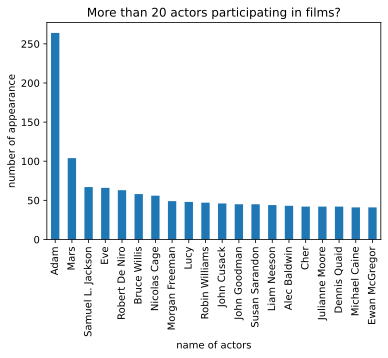

In [ ]:
ax=df["Cast"].sum().sort_values(ascending=False).head(20).plot.bar()
ax.set(title="Top 20 actors in movies?",ylabel="number of appearance",xlabel="name of actors")

##6.2  Top 20 revenue movies

##We will learn through it the average earnings and what films earn the most


[Text(0, 0.5, 'Revenue'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'Top 20 revenue')]

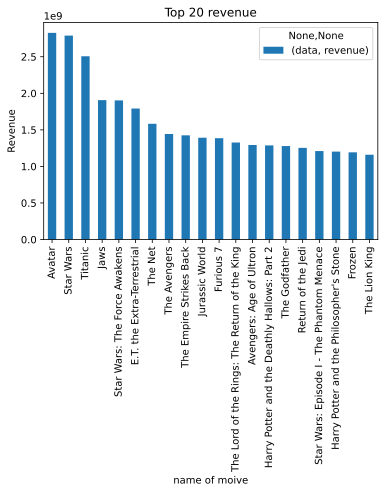

In [ ]:

top_20=df.loc[df[("data","revenue")].sort_values(ascending=False).head(20).index].plot.bar(x=("data","original_title"),y=("data","revenue"))
top_20.set(title="Top 20 revenue",xlabel="name of moive",ylabel="Revenue")


## 6.2 top 20 moives they cost


### We will know by the average cost of any film


[Text(0, 0.5, 'budget'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'top 20 moives they cost')]

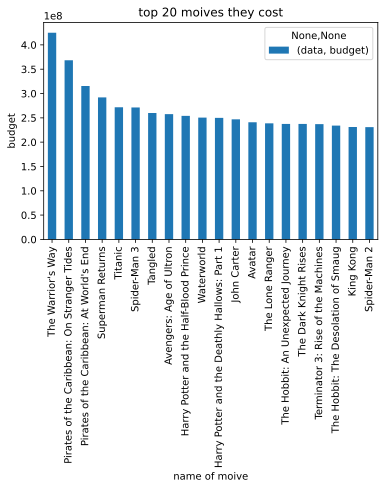

In [ ]:

top_20=df.loc[df[("data","budget")].sort_values(ascending=False).head(20).index].plot.bar(x=("data","original_title"),y=("data","budget"))
top_20.set(title="top 20 moives they cost",xlabel="name of moive",ylabel="budget")


##6.3 top 20 moives popular 
###To watch the most popular films and thus transform them to understand why they are the most popular so that we can produce the same in the future

[Text(0, 0.5, 'popularity'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, '20 most popular movies')]

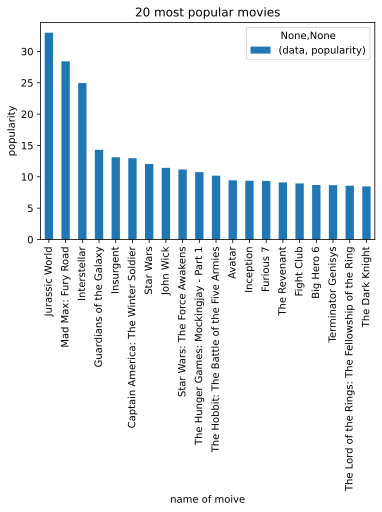

In [ ]:

top_20=df.loc[df[("data","popularity")].sort_values(ascending=False).head(20).index].plot.bar(x=("data","original_title"),y=("data","popularity"))
top_20.set(title="top 20 moives popular ",xlabel="name of moive",ylabel="popularity")


## 6.4 Top 20 best movies get vote count
### To learn and understand how films are voted o



[Text(0, 0.5, 'vote_count'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'Top 20 best movies get vote count')]

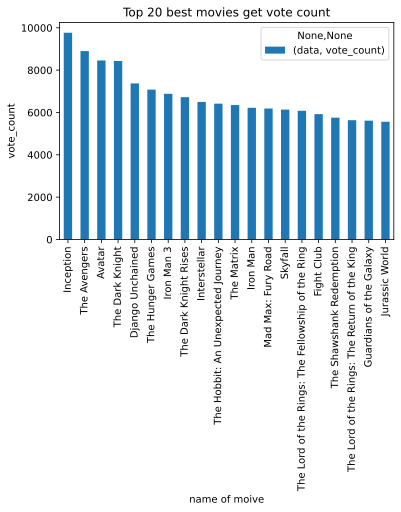

In [ ]:

top_20=df.loc[df[("data","vote_count")].sort_values(ascending=False).head(20).index].plot.bar(x=("data","original_title"),y=("data","vote_count"))
top_20.set(title="Top 20 best movies get vote count",xlabel="name of moive",ylabel="vote_count")

##6.5 Top 20 best movies get vote average

[Text(0, 0.5, 'vote_average'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'Top 20 best movies get vote average')]

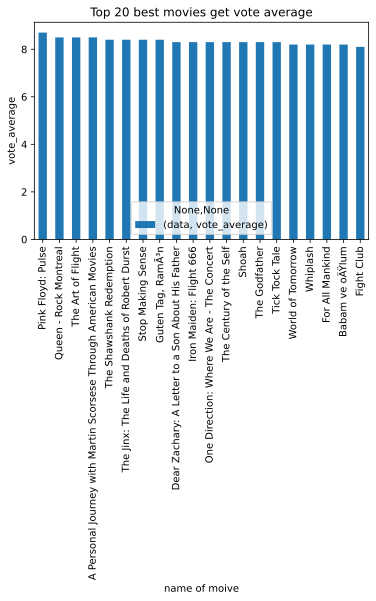

In [ ]:
top_20=df.loc[df[("data","vote_average")].sort_values(ascending=False).head(20).index]
ax =top_20.plot.bar(x=("data","original_title"),y=("data","vote_average"))
ax.set(title="Top 20 best movies get vote average",xlabel="name of moive",ylabel="vote_average")

## 6.6 Top 20 moive  directors
##Based on the number of moives they have directed


[Text(0.5, 1.0, 'top 20 directors  Participate in moives Based on the number of moives they have directed')]

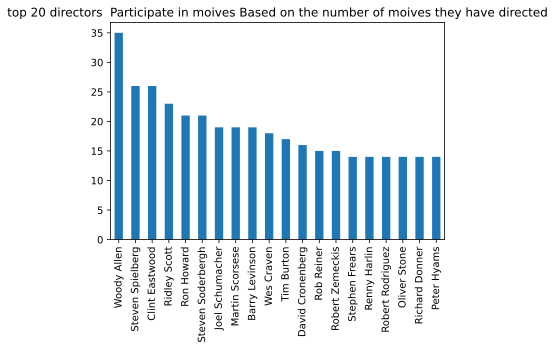

In [ ]:
 
top_20=df[("data","director")].value_counts().sort_values(ascending=False).head(20).plot.bar()
top_20.set(title="top 20 directors  Participate in moives Based on the number of moives they have directed")

##6.7 who's the top 20 directors make profits in their journey
## to choose best director

[Text(0, 0.5, 'profits'),
 Text(0.5, 0, 'name of directors'),
 Text(0.5, 1.0, " who's the top 20 directors make profits in their journey")]

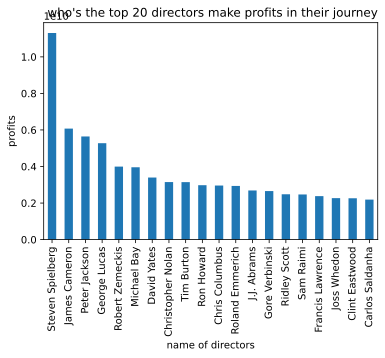

In [ ]:
top_20=df.groupby(by=("data","director")).sum()
top_20=top_20.loc[top_20[("data","profits")].sort_values(ascending=False).head(20).index]
x=top_20[("data","profits")].plot.bar()
x.set(title=" who's the top 20 directors make profits in their journey",xlabel="name of directors",ylabel="profits")

## 6.8 top 20 genres repeated in movies

## To find out what people assaulted in the movies



[Text(0, 0.5, 'The number of repetitions'),
 Text(0.5, 0, 'Genres'),
 Text(0.5, 1.0, 'top 20 genres repeated in movies')]

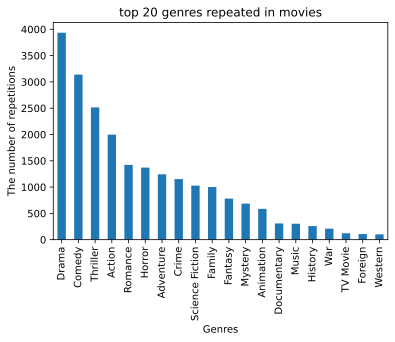

In [ ]:
top_20=df["Genres"].sum().sort_values(ascending=False).head(20)
ax=top_20.plot.bar()
ax.set(title="top 20 genres repeated in movies",xlabel="Genres",ylabel="The number of repetitions")

## 6.9 The most moives-producing companies (20)


[Text(0, 0.5, 'number of moives'), Text(0.5, 0, 'name of company')]

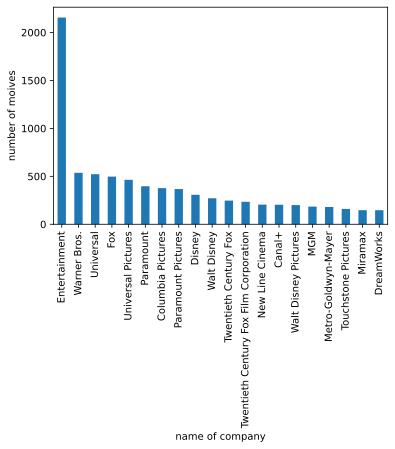

In [ ]:
top_20=df["Production_companies"].sum().sort_values(ascending=False).head(20)
ax=top_20.plot.bar()
ax.set(xlabel="name of company",ylabel="number of moives")

## 6.10 top  20 moives get profits
Knowing this, we can look into these films and find out why they succeeded so much




[Text(0, 0.5, 'profits'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'Top 20 profits')]

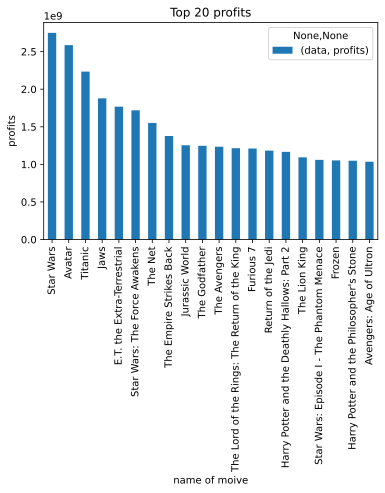

In [ ]:
top_20=df.loc[df[("data","profits")].sort_values(ascending=False).head(20).index]
ax =top_20.plot.bar(x=("data","original_title"),y=("data","profits"))
ax.set(title="Top 20 profits",xlabel="name of moive",ylabel="profits")

## 6.11 It shows us how much money the moives makers get

1



[Text(0, 0.5, 'profits'),
 Text(0.5, 0, 'name of moive'),
 Text(0.5, 1.0, 'Top 20 profits')]

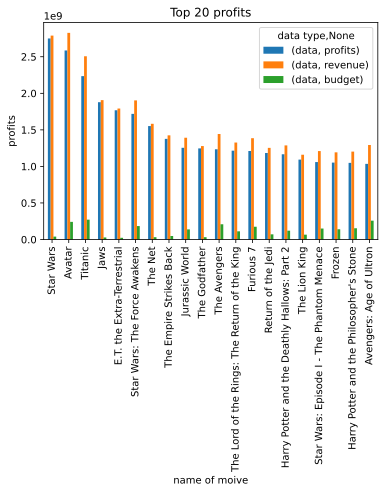

In [ ]:
# revenue with profits with budjet
top_20=df.loc[df[("data","profits")].sort_values(ascending=False).head(20).index]
ax =top_20.plot.bar(x=("data","original_title"),y=[("data","profits"),("data","revenue"),("data","budget")],stacked=False)
ax.set(title="Top 20 profits",xlabel="name of moive",ylabel="profits")

## 6.12 runtime peroperties(mean , std , max...) 
How long is a normal movie?

In [ ]:

df[("data",'runtime')].describe()


count    8868.000000
mean      102.363780
std        28.189247
min         0.000000
25%        90.000000
50%        99.000000
75%       111.000000
max       877.000000
Name: (data, runtime), dtype: float64

## 6.13 Is there a relationship between the duration of the movie and its popularity
---






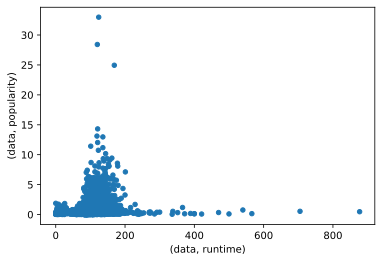

In [ ]:
df.plot(y=("data","popularity"),x=("data","runtime") ,kind="scatter")

## 6.14 Is there a relationship between the profits of the movie and its budget
 


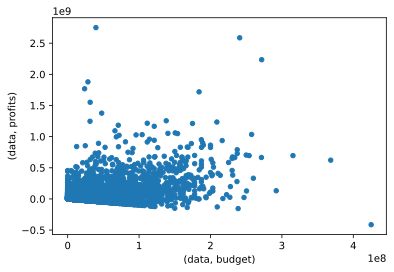

In [ ]:
df.plot(y=("data","profits"),x=("data","budget"), kind="scatter" )

##6.15 producation of moives per year
To find out if the moives market is increasing or declining


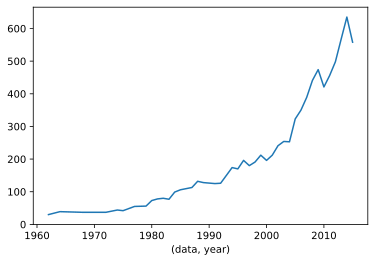

In [ ]:

df[("data","year")]=df[("data","release_date")].dt.year
x=df.groupby(by=[("data","year")]).count()[("data","original_title")]
x.plot()

## 6.16 The most profitable companies to invest in
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 'profits'),
 Text(0.5, 0, 'company name'),
 Text(0.5, 1.0, 'total profits')]

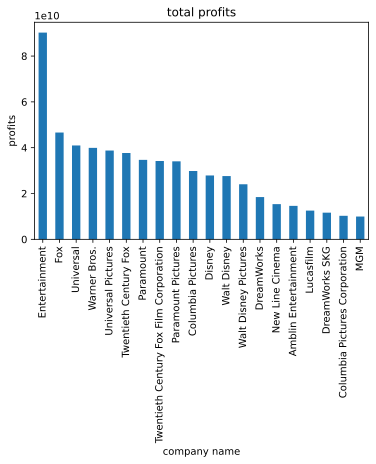

In [ ]:
comp_profits =pd.Series()
for x in df["Production_companies"].columns:
  comp_profits[x]=df[df[("Production_companies",x)] > 0][("data","profits")].sum()
x=comp_profits.sort_values(ascending=False).head(20).plot.bar()
x.set(title="total profits",xlabel="company name",ylabel="profits")

## 6.17 is the  relation shape betwean popularity and profits ?



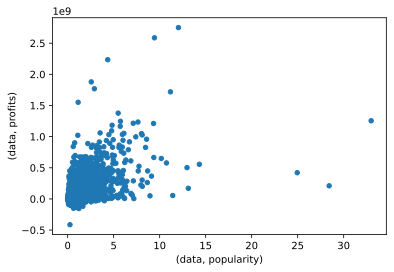

In [ ]:
df.plot(y=("data","profits"),x=("data","popularity"), kind="scatter" )

### 6.18 is the  relation shape betwean popularity and budjet?


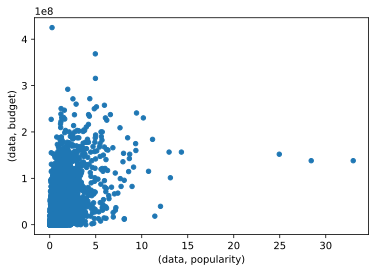

In [ ]:
df.plot(y=("data","budget"),x=("data","popularity"), kind="scatter" )

### **6.19** is the  relation shape betwean popularity and budjet?
To find out what are the appropriate expenses for a successful moive

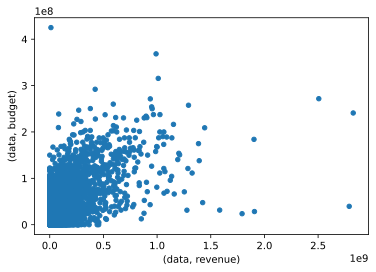

In [ ]:
df.plot(y=("data","budget"),x=("data","revenue"), kind="scatter" )

## 6.20 what is most genres repeat In the 50  most profitable movies
To determine genres for any success movie


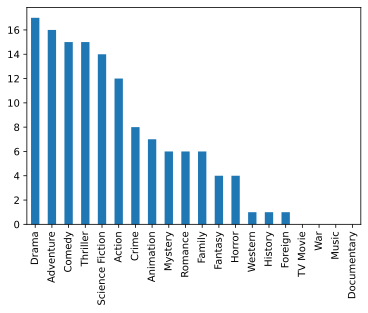

In [ ]:
df.iloc[df[("data","popularity")].sort_values(ascending=False).head(50).index]["Genres"].sum().sort_values(ascending=False).plot.bar()

## 6.21 is there releation betwean vote count and profits

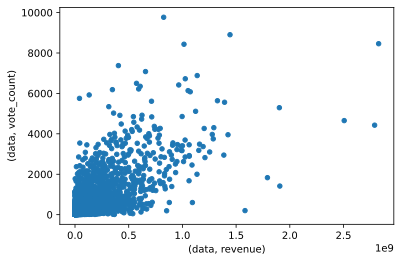

In [ ]:
df.plot(y=("data","vote_count"),x=("data","revenue"), kind="scatter" )

## 6.22 total profits made by moives per year 
It shows us that despite the surrounding conditions, I still maintain the same level of increase

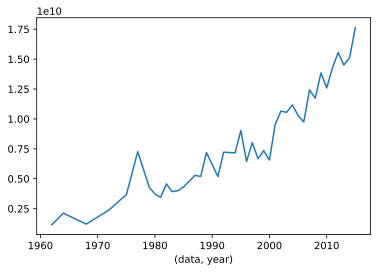

In [ ]:
df[("data","year")]=df[("data","release_date")].dt.year
x=df.groupby(by=[("data","year")]).sum()[("data","profits")]
x.plot()

## 6.22 Profits made by movies at their released months
Find out the best months to released

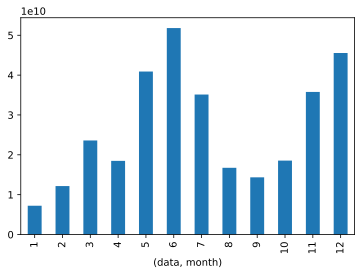

In [ ]:
df[("data","month")]=df[("data","release_date")].dt.month
x=df.groupby(by=[("data","month")]).sum()[("data","profits")]
x.plot.bar()

# Conclusion
## this project depend on 4 main step 
  1. import library and data set
  2. clean data from any null values and Delete columns that cannot be used
  3. wrangle data , This is done by reformatting release data column and reconfiguring profits column and if any company genres or comapny or actor Participated in moive must be True to make that easy i use multiidnex 2 level 
  4. explore data By setting questions and answering them
## observation
 1. there are many null values and  i think we can fill this values as  shows in 5.2 get rows that have null values and delete it 
 2. There is a strange thing, there is a movie that has been added twice and I think this is a mistake and that duplicate row has been erased 
## some advice 
*  It became clear to us from data that the movie economy is very profitable. 
The value of the profit of one film may be ten times or more than the value of its production, as it appears in 7.10
* The movie economy will continue to increase, perhaps after a very, very simple decline
* Choose these release months  -  June, July, November, December,May 
* Choose these genre   Drama    'Adventure', 'Comedy', 'Thriller', 'Science Fiction', 'Action','Crime'
* choose director Steven Spielberg,James Cameron ,George Lucas PeterJackson,   Chris Columbus,Robert Zemeckis   
* mean of the budget of the most moives get profits 99 million    
## limitions
limitions in this dataset contains are null and zero values in some columns During the data cleaning process  i split geners and compay_producet into columns for example if this moive is action so in column action equal True and  we have high probability of making high profits the best ditector and companies and actors as show in data vizulization 
 

In [ ]:
!jupyter nbconvert --to html /content/Investigate_a_Dataset.ipynb


[NbConvertApp] Converting notebook /content/Investigate_a_Dataset.ipynb to html
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'application/vnd.colab-display-data+json'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 7095961 bytes to /content/Investigate_a_Dataset.html
